# Topic Modeling을 통한 강의평 분석

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# load libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

from utils import *

In [3]:
# load dataset
data = pd.read_csv('../data/2020LectureReview.csv', index_col=0)

In [4]:
# make before/after COVID-19 column
data['COVID-19'] = data['ReviewSemester'].apply(lambda x: 'before' if x not in ['20년 1학기 수강자', '20년 2학기 수강자'] else 'after')

In [5]:
data.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after
2,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before
3,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before
4,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after


## Task1 : 전체 강의평에 대하여 토픽 모델링 진행 후 코로나 전/후 강의평 토픽 비교

### Preprocessing

In [6]:
data_, text_tokenized_ = Preprocessor(data, list(data['ReviewText'].values))
data_.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after,시험 이제 떠서 놀람 감사,5
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after,그냥 괜찮 자습 기간 범위 시험 본다 그러니까 당황 똑똑 나쁘 다만 시간 연속 힘들...,20
2,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before,한국은행 금융 통화 위원 지내 그런지 간간히 들려 현장 쏠쏠 재미 중간고사 기말고사...,37
3,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before,똑똑 피피티 위주 현장 경험 풍부 그런지 설명,8
4,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after,매주 온라인 올려 불편 무난 매주 출석 과제 기말 연구 보고서 기말 온라인 시험 이...,37


### Topic Modeling (LDA)

In [7]:
# topic modeling => topic list
print('============ Topic List ============')
corpus_, lda_ = ModelingLDA(text_tokenized_)

============ Topic List ============
(0, '0.035*"학생" + 0.028*"학기" + 0.022*"생각" + 0.013*"수강" + 0.011*"대학"')
(1, '0.063*"학생" + 0.033*"성적" + 0.030*"질문" + 0.025*"평가" + 0.019*"생각"')
(2, '0.079*"ㅎㅎ" + 0.074*"최고" + 0.055*"ㅠㅠ" + 0.046*"재밌" + 0.039*"학점"')
(3, '0.043*"필기" + 0.035*"시험" + 0.035*"피피티" + 0.024*"암기" + 0.023*"말씀"')
(4, '0.106*"교양" + 0.030*"편하" + 0.027*"과학" + 0.024*"수준" + 0.022*"문과"')
(5, '0.093*"출석" + 0.063*"출결" + 0.059*"채플" + 0.048*"개꿀" + 0.038*"그냥"')
(6, '0.086*"과제" + 0.061*"시간" + 0.026*"학기" + 0.015*"제출" + 0.015*"조별"')
(7, '0.067*"기말" + 0.062*"중간" + 0.043*"과제" + 0.035*"퀴즈" + 0.028*"시험"')
(8, '0.034*"모르" + 0.033*"그냥" + 0.029*"영어" + 0.023*"ㅋㅋ" + 0.020*"사람"')
(9, '0.057*"문제" + 0.040*"시험" + 0.017*"시간" + 0.015*"부분" + 0.015*"이해"')
(10, '0.046*"발표" + 0.025*"생각" + 0.021*"주제" + 0.016*"기독교" + 0.016*"토론"')
(11, '0.071*"시험" + 0.044*"공부" + 0.032*"열심히" + 0.023*"족보" + 0.022*"학점"')
(12, '0.046*"학기" + 0.044*"비대" + 0.041*"무난" + 0.041*"과제" + 0.032*"코로나"')
(13, '0.027*"과제" + 0.024*"학점" + 0.021*"어렵" + 0

In [8]:
topic_table_ = MakeTopicTable(corpus_, lda_)

In [9]:
df_ = pd.concat([data_.reset_index(drop=True), topic_table_.reset_index(drop=True)], axis=1)
df_.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt,TopicIndex,TopicProportion,TopicList
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after,시험 이제 떠서 놀람 감사,5,11,0.45674,"[(0, 0.011114996), (1, 0.011114979), (2, 0.177..."
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after,그냥 괜찮 자습 기간 범위 시험 본다 그러니까 당황 똑똑 나쁘 다만 시간 연속 힘들...,20,11,0.45941,"[(6, 0.124695666), (8, 0.21063277), (11, 0.459..."
2,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before,한국은행 금융 통화 위원 지내 그런지 간간히 들려 현장 쏠쏠 재미 중간고사 기말고사...,37,11,0.32786,"[(0, 0.050419517), (1, 0.06724479), (3, 0.0897..."
3,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before,똑똑 피피티 위주 현장 경험 풍부 그런지 설명,8,13,0.29137,"[(0, 0.24919057), (3, 0.21885546), (10, 0.1590..."
4,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after,매주 온라인 올려 불편 무난 매주 출석 과제 기말 연구 보고서 기말 온라인 시험 이...,37,7,0.47992,"[(7, 0.47991782), (10, 0.117878534), (12, 0.38..."


In [10]:
df_.to_csv('Task1_data_with_topic.csv')

In [11]:
before_df_ = df_[df_['COVID-19']=='before']
after_df_ = df_[df_['COVID-19']=='after']

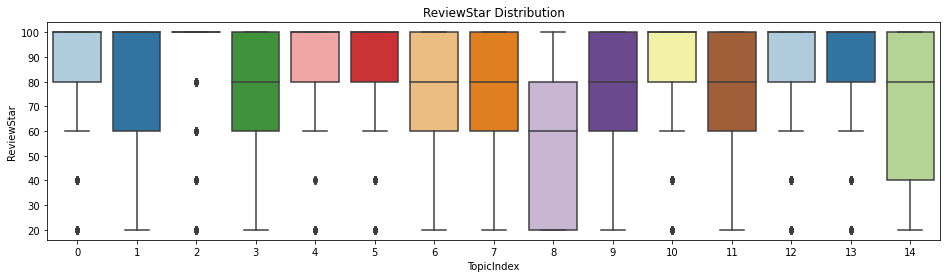

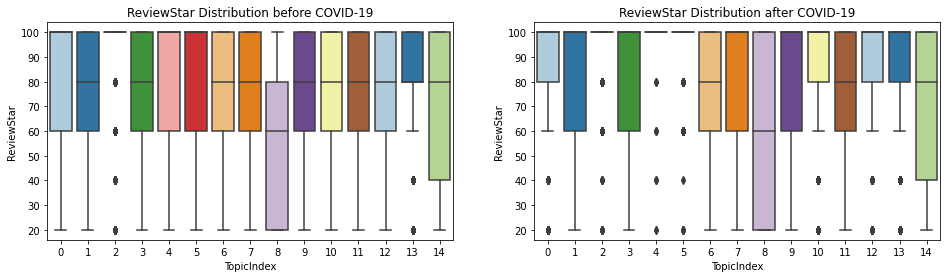

In [12]:
# ReviewStar Distribution

fig, ax = plt.subplots(1, 1, figsize=(16, 4))

sns.boxplot(x='TopicIndex', y='ReviewStar', data=df_, palette='Paired')
plt.title('ReviewStar Distribution')

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

plt.subplot(121)
sns.boxplot(x='TopicIndex', y='ReviewStar', data=before_df_, palette='Paired')
plt.title('ReviewStar Distribution before COVID-19')

plt.subplot(122)
sns.boxplot(x='TopicIndex', y='ReviewStar', data=after_df_, palette='Paired')
plt.title('ReviewStar Distribution after COVID-19')

plt.show()

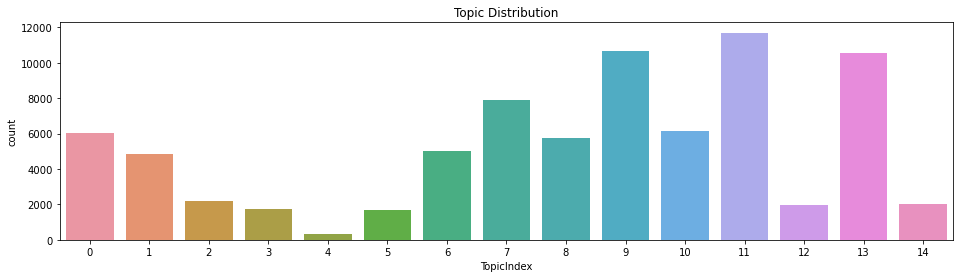

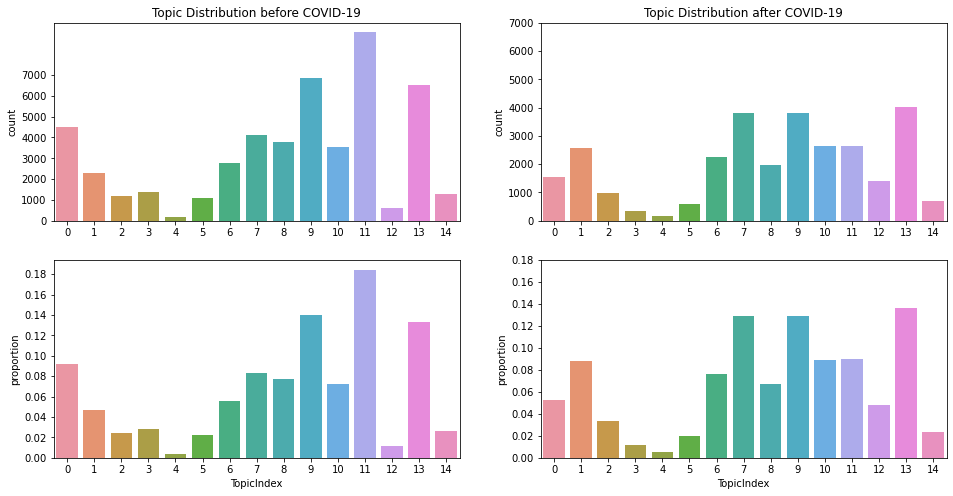

In [13]:
# Topic Distribution

before_temp_ = before_df_.groupby('TopicIndex').count()['LectureUrl']
after_temp_ = after_df_.groupby('TopicIndex').count()['LectureUrl']

fig, ax = plt.subplots(1, 1, figsize=(16, 4))

sns.countplot(x=df_['TopicIndex'])
plt.title('Topic Distribution')

fig, ax = plt.subplots(2, 2, figsize=(16, 8))

plt.subplot(221)
sns.countplot(x=before_df_['TopicIndex'])
plt.yticks(range(0, 7001, 1000))
plt.xlabel('')
plt.title('Topic Distribution before COVID-19')

plt.subplot(222)
sns.countplot(x=after_df_['TopicIndex'])
plt.yticks(range(0, 7001, 1000))
plt.xlabel('')
plt.title('Topic Distribution after COVID-19')

plt.subplot(223)
sns.barplot(x=before_temp_.index, y=before_temp_.values/len(before_df_))
plt.yticks(np.arange(0, 0.20, 0.02))
plt.ylabel('proportion')

plt.subplot(224)
sns.barplot(x=after_temp_.index, y=after_temp_.values/len(after_df_))
plt.yticks(np.arange(0, 0.20, 0.02))
plt.ylabel('proportion')

plt.show()

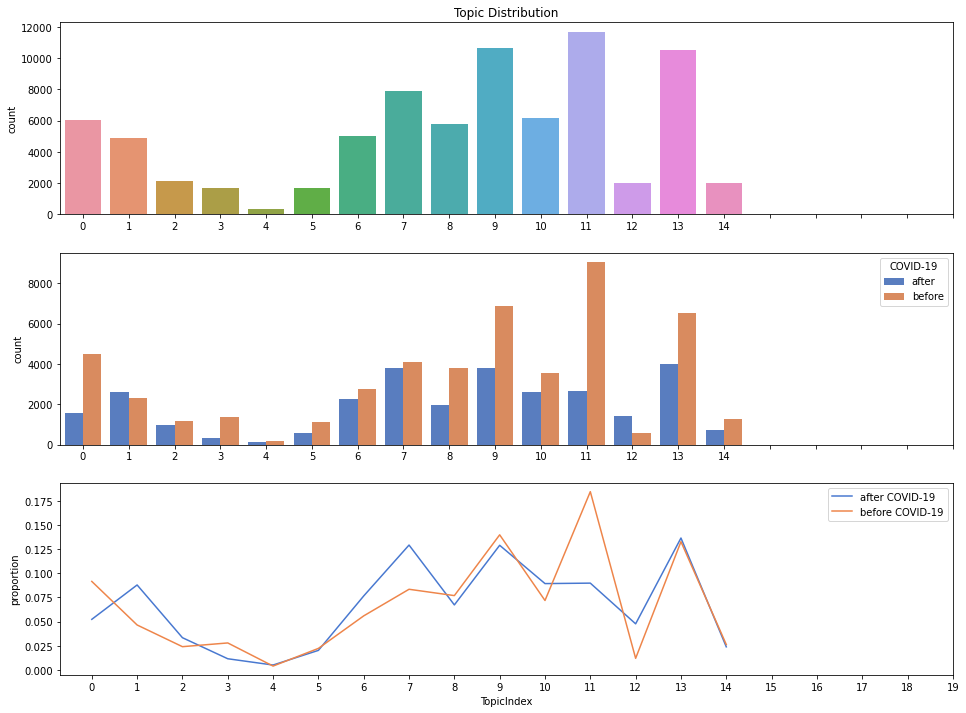

In [14]:
# Compare Topic Distribution before/after COVID19

fig, ax = plt.subplots(3, 1, figsize=(16, 12))

plt.subplot(311)
sns.countplot(x='TopicIndex', data=df_)
plt.xticks(range(0, 20, 1))
plt.xlabel('')
plt.title('Topic Distribution')

plt.subplot(312)
sns.countplot(x='TopicIndex', data=df_, hue='COVID-19', palette='muted')
plt.xticks(range(0, 20, 1))
plt.xlabel('')
plt.ylabel('count')

plt.subplot(313)
sns.lineplot(x=after_temp_.index, y=after_temp_.values/len(after_df_), label='after COVID-19', color=sns.color_palette('muted')[0])
sns.lineplot(x=before_temp_.index, y=before_temp_.values/len(before_df_), label='before COVID-19', color=sns.color_palette('muted')[1])
plt.xticks(range(0, 20, 1))
plt.ylabel('proportion')

plt.show()

## Task2 : 코로나 전/후 강의평에 대하여 각각 토픽 모델링 진행 후 코로나 전/후 강의평 토픽 비교

### Preprocessing

In [15]:
before_data = data[data['COVID-19']=='before']
after_data = data[data['COVID-19']=='after']

In [16]:
before_text = list(before_data['ReviewText'].values)
after_text = list(after_data['ReviewText'].values)

In [17]:
before_data, before_text_tokenized = Preprocessor(before_data, before_text)
after_data, after_text_tokenized = Preprocessor(after_data, after_text)

In [18]:
before_data.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt
2,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before,한국은행 금융 통화 위원 지내 그런지 간간히 들려 현장 쏠쏠 재미 중간고사 기말고사...,37
3,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before,똑똑 피피티 위주 현장 경험 풍부 그런지 설명,8
6,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,20.0,18년 2학기 수강자,교수님의 수업은 이해하기 쉬웠고 질적연구와 현장연구에 대해 잘 설명해주셔서 수업은 ...,before,이해 쉬웠 연구 현장 연구 설명 중간고사 비중 성적 산출 아쉬운 부분,12
7,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,100.0,18년 2학기 수강자,개인적이지만 수업 괜찮았고 설명 잘해주심. 성적은 그냥 시험으로 갈리는듯? 조모임 ...,before,개인 괜찮 설명 주심 성적 그냥 시험 갈리 모임 빡세 자주 만나 조원 만나 헤쳐 나...,48
16,https://yonsei.everytime.kr/lecture/view/2073400,국제이해교육,이무성,40.0,19년 2학기 수강자,교수님 좋고 학구적이고 내용도 좋은데 마이너스 폭격기임^^,before,학구 은데 마이너스 폭격기,4


In [19]:
after_data.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after,시험 이제 떠서 놀람 감사,5
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after,그냥 괜찮 자습 기간 범위 시험 본다 그러니까 당황 똑똑 나쁘 다만 시간 연속 힘들...,20
4,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after,매주 온라인 올려 불편 무난 매주 출석 과제 기말 연구 보고서 기말 온라인 시험 이...,37
5,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,20.0,20년 1학기 수강자,조교가 일을 안하는건지 교수가 일을 안하는건지 강의가 맨날 늦게 올라옴 제 시간에 ...,after,조교 건지 건지 맨날 올라옴 시간 니까 열정 초반 부터 사라짐 그러 저작 일찍 내려...,17
8,https://yonsei.everytime.kr/lecture/view/1600344,현대독일산문,이진영,100.0,20년 1학기 수강자,이번 학기에 들은 강의 중에 가장 좋았던 수업 중 하나. 교수님께서 학생들 많이 배...,after,학기 가장 하나 학생 배려 필요 학생 감상 이나 해석 개입 참고 배경 지식 작가 의...,47


### EDA

In [20]:
# Number of Texts & tokens

before_counter = Counter(sum(before_text_tokenized, []))
after_counter = Counter(sum(after_text_tokenized, []))

print('COVID-19 이전 전체 강의평 개수: {}개'.format(len(before_text)))
print('COVID-19 이후 전체 강의평 개수: {}개'.format(len(after_text)))

print('COVID-19 이전 전체 토큰 개수: {}개'.format(len(before_counter)))
print('COVID-19 이후 전체 토큰 개수: {}개'.format(len(after_counter)))

COVID-19 이전 전체 강의평 개수: 49127개
COVID-19 이후 전체 강의평 개수: 29423개
COVID-19 이전 전체 토큰 개수: 26348개
COVID-19 이후 전체 토큰 개수: 19991개


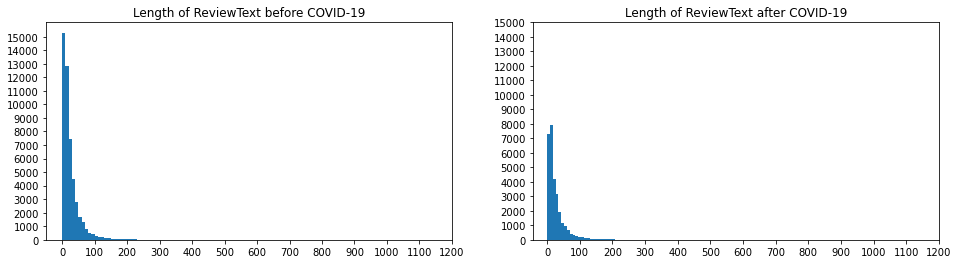

In [21]:
# Length of Texts

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

plt.subplot(121)
plt.hist(before_data['TokenCnt'], bins=100)
plt.xticks(range(0, 1201, 100))
plt.yticks(range(0, 15001, 1000))
plt.title('Length of ReviewText before COVID-19')

plt.subplot(122)
plt.hist(after_data['TokenCnt'], bins=100)
plt.xticks(range(0, 1201, 100))
plt.yticks(range(0, 15001, 1000))
plt.title('Length of ReviewText after COVID-19')

plt.show()

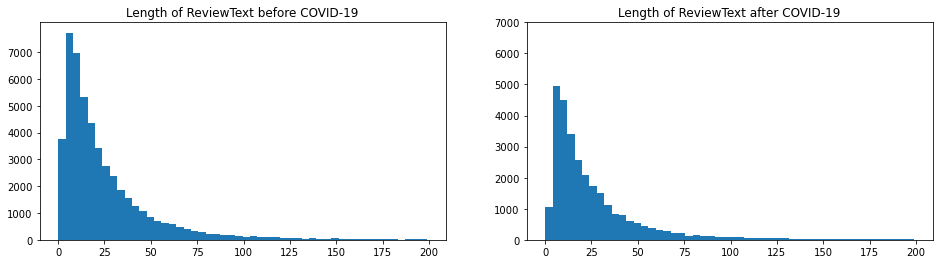

In [22]:
# Length of Texts (zoom-in)

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

plt.subplot(121)
plt.hist(before_data['TokenCnt'][before_data['TokenCnt']<200], bins=50)
plt.xticks(range(0, 201, 25))
plt.yticks(range(0, 7001, 1000))
plt.title('Length of ReviewText before COVID-19')

plt.subplot(122)
plt.hist(after_data['TokenCnt'][after_data['TokenCnt']<200], bins=50)
plt.xticks(range(0, 201, 25))
plt.yticks(range(0, 7001, 1000))
plt.title('Length of ReviewText after COVID-19')

plt.show()

### Topic Modeling (LDA)

In [23]:
print('========== Topic List before COVID-19 ==========')
before_corpus, before_lda = ModelingLDA(before_text_tokenized)
print()
print('========== Topic List after COVID-19 ==========')
after_corpus, after_lda = ModelingLDA(after_text_tokenized)

========== Topic List before COVID-19 ==========
(0, '0.104*"과제" + 0.033*"시간" + 0.031*"시험" + 0.021*"퀴즈" + 0.015*"학점"')
(1, '0.047*"재밌" + 0.041*"채플" + 0.031*"흥미" + 0.027*"무난" + 0.027*"나름"')
(2, '0.042*"그냥" + 0.039*"모르" + 0.037*"ㅋㅋ" + 0.030*"ㅋㅋㅋ" + 0.021*"아니"')
(3, '0.080*"중간" + 0.078*"기말" + 0.036*"시험" + 0.028*"점수" + 0.028*"중간고사"')
(4, '0.016*"생각" + 0.016*"사람" + 0.015*"수강" + 0.013*"과목" + 0.013*"학기"')
(5, '0.027*"대학" + 0.020*"학교" + 0.017*"최고" + 0.014*"이런" + 0.013*"와서"')
(6, '0.069*"시험" + 0.046*"족보" + 0.036*"외우" + 0.034*"피피티" + 0.030*"공부"')
(7, '0.053*"질문" + 0.045*"조교" + 0.035*"설명" + 0.030*"채점" + 0.028*"기준"')
(8, '0.041*"발표" + 0.033*"과제" + 0.024*"모임" + 0.020*"시간" + 0.020*"조별"')
(9, '0.181*"영어" + 0.030*"실력" + 0.024*"영강" + 0.024*"발음" + 0.022*"한국어"')
(10, '0.091*"출석" + 0.067*"리딩" + 0.043*"출결" + 0.031*"부르" + 0.029*"지각"')
(11, '0.060*"학생" + 0.025*"학기" + 0.018*"ㅎㅎ" + 0.015*"시간" + 0.015*"재밌"')
(12, '0.020*"생각" + 0.014*"학생" + 0.012*"시간" + 0.009*"부분" + 0.008*"지식"')
(13, '0.088*"학점" + 0.032*"과목" + 0

In [24]:
before_topic_table = MakeTopicTable(before_corpus, before_lda)
after_topic_table = MakeTopicTable(after_corpus, after_lda)

In [25]:
before_df = pd.concat([before_data.reset_index(drop=True), before_topic_table.reset_index(drop=True)], axis=1)
after_df = pd.concat([after_data.reset_index(drop=True), after_topic_table.reset_index(drop=True)], axis=1)

In [26]:
before_df.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt,TopicIndex,TopicProportion,TopicList
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before,한국은행 금융 통화 위원 지내 그런지 간간히 들려 현장 쏠쏠 재미 중간고사 기말고사...,37,14,0.54242,"[(1, 0.053776972), (5, 0.036484156), (7, 0.042..."
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before,똑똑 피피티 위주 현장 경험 풍부 그런지 설명,8,14,0.39671,"[(5, 0.23948747), (12, 0.27489465), (14, 0.396..."
2,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,20.0,18년 2학기 수강자,교수님의 수업은 이해하기 쉬웠고 질적연구와 현장연구에 대해 잘 설명해주셔서 수업은 ...,before,이해 쉬웠 연구 현장 연구 설명 중간고사 비중 성적 산출 아쉬운 부분,12,12,0.57132,"[(3, 0.28516316), (5, 0.08196094), (12, 0.5713..."
3,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,100.0,18년 2학기 수강자,개인적이지만 수업 괜찮았고 설명 잘해주심. 성적은 그냥 시험으로 갈리는듯? 조모임 ...,before,개인 괜찮 설명 주심 성적 그냥 시험 갈리 모임 빡세 자주 만나 조원 만나 헤쳐 나...,48,8,0.23002,"[(1, 0.1355366), (2, 0.04813947), (3, 0.157725..."
4,https://yonsei.everytime.kr/lecture/view/2073400,국제이해교육,이무성,40.0,19년 2학기 수강자,교수님 좋고 학구적이고 내용도 좋은데 마이너스 폭격기임^^,before,학구 은데 마이너스 폭격기,4,6,0.41360,"[(0, 0.013346505), (1, 0.013346531), (2, 0.013..."


In [27]:
after_df.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt,TopicIndex,TopicProportion,TopicList
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after,시험 이제 떠서 놀람 감사,5,3,0.34416,"[(0, 0.011116714), (1, 0.011116714), (2, 0.187..."
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after,그냥 괜찮 자습 기간 범위 시험 본다 그러니까 당황 똑똑 나쁘 다만 시간 연속 힘들...,20,12,0.29131,"[(2, 0.09970199), (3, 0.11409552), (6, 0.20563..."
2,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after,매주 온라인 올려 불편 무난 매주 출석 과제 기말 연구 보고서 기말 온라인 시험 이...,37,4,0.78792,"[(4, 0.7879155), (6, 0.18925945)]"
3,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,20.0,20년 1학기 수강자,조교가 일을 안하는건지 교수가 일을 안하는건지 강의가 맨날 늦게 올라옴 제 시간에 ...,after,조교 건지 건지 맨날 올라옴 시간 니까 열정 초반 부터 사라짐 그러 저작 일찍 내려...,17,2,0.89215,"[(2, 0.8921546), (5, 0.05967757)]"
4,https://yonsei.everytime.kr/lecture/view/1600344,현대독일산문,이진영,100.0,20년 1학기 수강자,이번 학기에 들은 강의 중에 가장 좋았던 수업 중 하나. 교수님께서 학생들 많이 배...,after,학기 가장 하나 학생 배려 필요 학생 감상 이나 해석 개입 참고 배경 지식 작가 의...,47,6,0.23942,"[(1, 0.18143885), (3, 0.09706864), (5, 0.23575..."


In [28]:
before_df.to_csv('Task2_data_before_COVID19_with_topic.csv')
after_df.to_csv('Task2_data_after_COVID19_with_topic.csv')

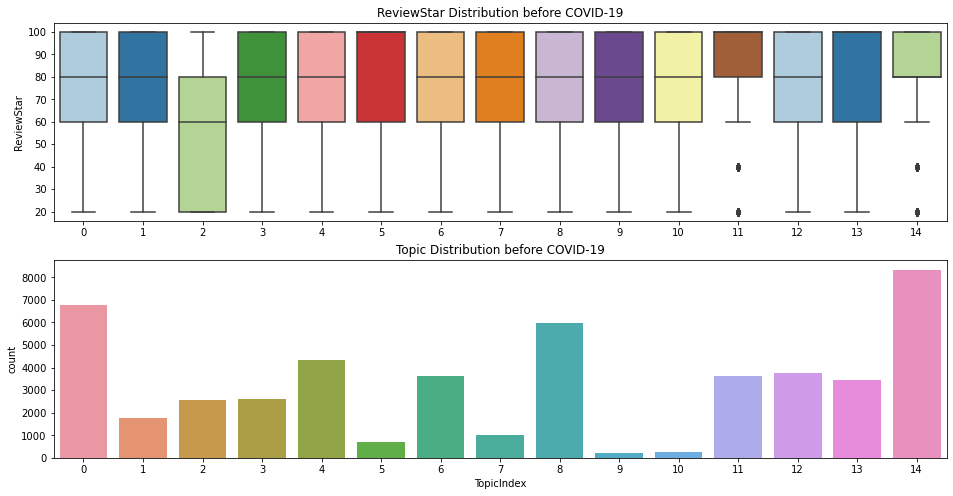

In [29]:
# Topic Distribution & ReviewStar Distribution before COVID-19

fig, ax = plt.subplots(2, 1, figsize=(16, 8))

plt.subplot(211)
sns.boxplot(x='TopicIndex', y='ReviewStar', data=before_df, palette='Paired')
plt.xlabel('')
plt.title('ReviewStar Distribution before COVID-19')

plt.subplot(212)
sns.countplot(x=before_topic_table['TopicIndex'])
plt.title('Topic Distribution before COVID-19')

plt.show()

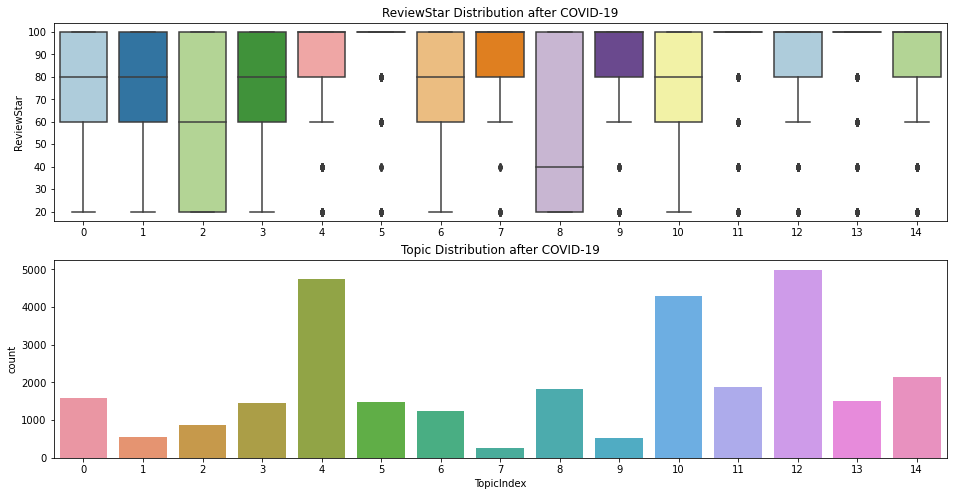

In [30]:
# Topic Distribution & ReviewStar Distribution after COVID-19

fig, ax = plt.subplots(2, 1, figsize=(16, 8))

plt.subplot(211)
sns.boxplot(x='TopicIndex', y='ReviewStar', data=after_df, palette='Paired')
plt.xlabel('')
plt.title('ReviewStar Distribution after COVID-19')

plt.subplot(212)
sns.countplot(x=after_topic_table['TopicIndex'])
plt.title('Topic Distribution after COVID-19')

plt.show()